In [1]:
# country = 'Switzerland'
# country = 'Russian Federation'
country = 'Serbia'
# country = 'United Arab Emirates'

# Экономические и социальные показатели `{country}`
Источники:
- World Bank national accounts data, and OECD National Accounts data files.
- World Bank, Poverty and Inequality Platform.
- International Telecommunication Union (ITU).
- Statistical databases and publications from national statistical offices; Eurostat: Demographic Statistics.

Тема посвящена изучению основных экономических и социальных показателей {country}, включая динамику ВВП, уровень бедности, демографические изменения и доступность информационных технологий. Анализ основан на данных международных и национальных статистических источников.

In [2]:
import pandas as pd
dfs = [
# gdp per capita
    pd.read_csv(
        'API_NY.GDP.PCAP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_142.csv', skiprows=4),
# gdp
    pd.read_csv(
        'NY.GDP/API_NY.GDP.MKTP.KD_DS2_en_csv_v2_34.csv', skiprows=4),
# internet users
    pd.read_csv(
        'IT.NET.USER/API_IT.NET.USER.ZS_DS2_en_csv_v2_2160.csv', skiprows=4),
# life expectancy
    pd.read_csv(
        'SP.DYN.LE00.IN/API_SP.DYN.LE00.IN_DS2_en_csv_v2_99.csv', skiprows=4),
# poverty
    pd.read_csv(
        'API_SI/API_SI.POV.DDAY_DS2_en_csv_v2_139.csv', skiprows=4),
# gini index
    pd.read_csv(
        'API_SI-2/API_SI.POV.GINI_DS2_en_csv_v2_105.csv', skiprows=4),
]
year_start = 1960
year_end = 2023
years = [str(i) for i in range(year_start, year_end+1)]

Так как по годам у World Bank представлены как столбцы, надо будет их транспонировать

In [3]:
def convert_df_to_series(df):
  year_columns = df.loc[:, str(year_start):str(year_end)]  # Select year columns
  series = year_columns.stack().reset_index(level=0, drop=True)
  return series

в каждом из датафреймов находим строку с `{country}` и создаем из нее `Series`

In [4]:
dfs_country_rows = [df[df['Country Name'] == country] for df in dfs]
dfs_series = [convert_df_to_series(row) for row in dfs_country_rows]

комбинируем серии в один общий датафрейм с общим индексом по годам
делаем `.reindex`, так как из-за пустот в данных при склеивании серий индексы могут быть не в том порядке

In [5]:
df_combined = pd.concat(dfs_series, axis=1)
df_combined.columns = [df_row.iloc[0]['Indicator Name'] for df_row in dfs_country_rows]
df_combined = df_combined.reindex(years)
df_combined = df_combined.dropna()

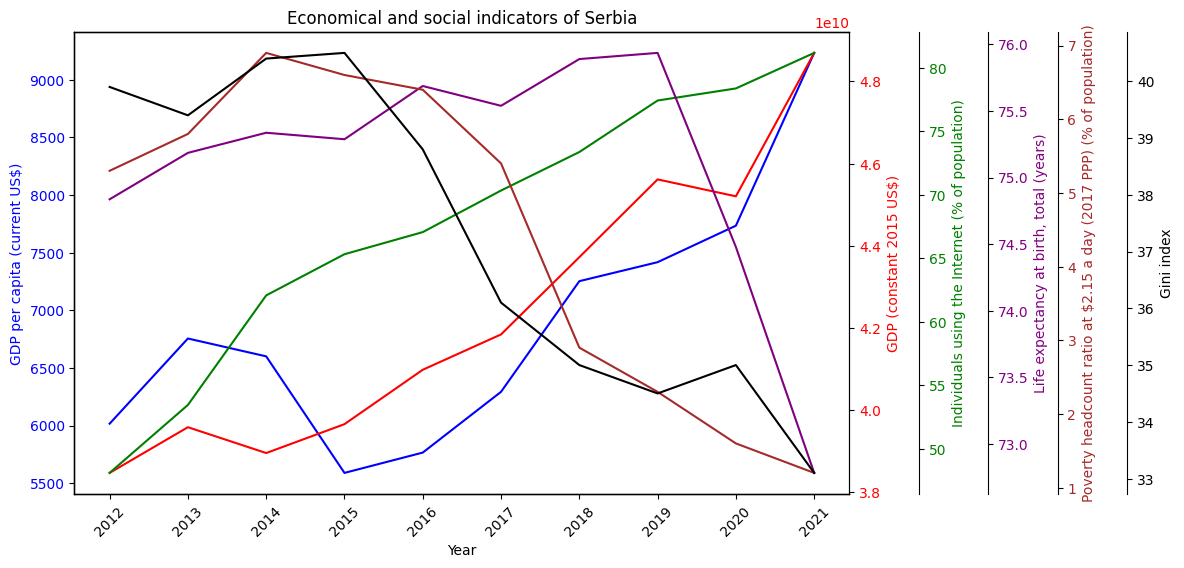

In [6]:
import matplotlib.pyplot as plt

# Example DataFrame

fig, host = plt.subplots(figsize=(10,6))

host.plot(df_combined.index, df_combined.iloc[:, 0], color='blue')
host.set_xlabel('Year')
host.set_ylabel(df_combined.columns[0], color='blue')
# host.spines['right'].set_position(('outward', 0))
host.tick_params(axis='y', labelcolor='blue') 
plt.title(f'Economical and social indicators of {country}')

colors = ['red', 'green', 'purple','brown','black']  
for i, column in enumerate(df_combined.columns[1:]):
    ax_new = host.twinx()
    ax_new.plot(df_combined.index, df_combined[column], color=colors[i])
    ax_new.set_ylabel(column, color=colors[i])
    ax_new.spines['right'].set_position(('outward', 50 * i))
    ax_new.tick_params(axis='y', labelcolor=colors[i])
    ax_new.yaxis.set_ticks_position('right')

host.tick_params(axis='x', labelrotation=45) 

plt.show()

In [7]:
df_combined.describe()

,GDP per capita (current US$),GDP (constant 2015 US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Gini index
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,6865.417591,4.227168e+10,67.664150,75.095854,4.440000,37.270000
std,1094.720271,3.408583e+09,10.818953,0.930790,2.200606,2.803985
min,5588.979444,3.846884e+10,48.100000,72.780488,1.200000,33.100000
25%,6085.095558,3.960019e+10,62.885575,74.923780,2.450000,35.000000
50%,6677.564943,4.141043e+10,68.693800,75.312195,5.350000,37.450000
75%,7376.005873,4.483318e+10,76.402775,75.650610,6.250000,39.775000
max,9232.957705,4.869607e+10,81.165900,75.936585,6.900000,40.500000


In [8]:
df_combined.corr()

,GDP per capita (current US$),GDP (constant 2015 US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Gini index
GDP per capita (current US$),1.000000,0.880721,0.662837,-0.681589,-0.872208,-0.821194
GDP (constant 2015 US$),0.880721,1.000000,0.891724,-0.498507,-0.921672,-0.953767
Individuals using the Internet (% of population),0.662837,0.891724,1.000000,-0.246310,-0.734541,-0.847537
"Life expectancy at birth, total (years)",-0.681589,-0.498507,-0.246310,1.000000,0.473296,0.348876
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),-0.872208,-0.921672,-0.734541,0.473296,1.000000,0.920010
Gini index,-0.821194,-0.953767,-0.847537,0.348876,0.920010,1.000000


<Axes: >

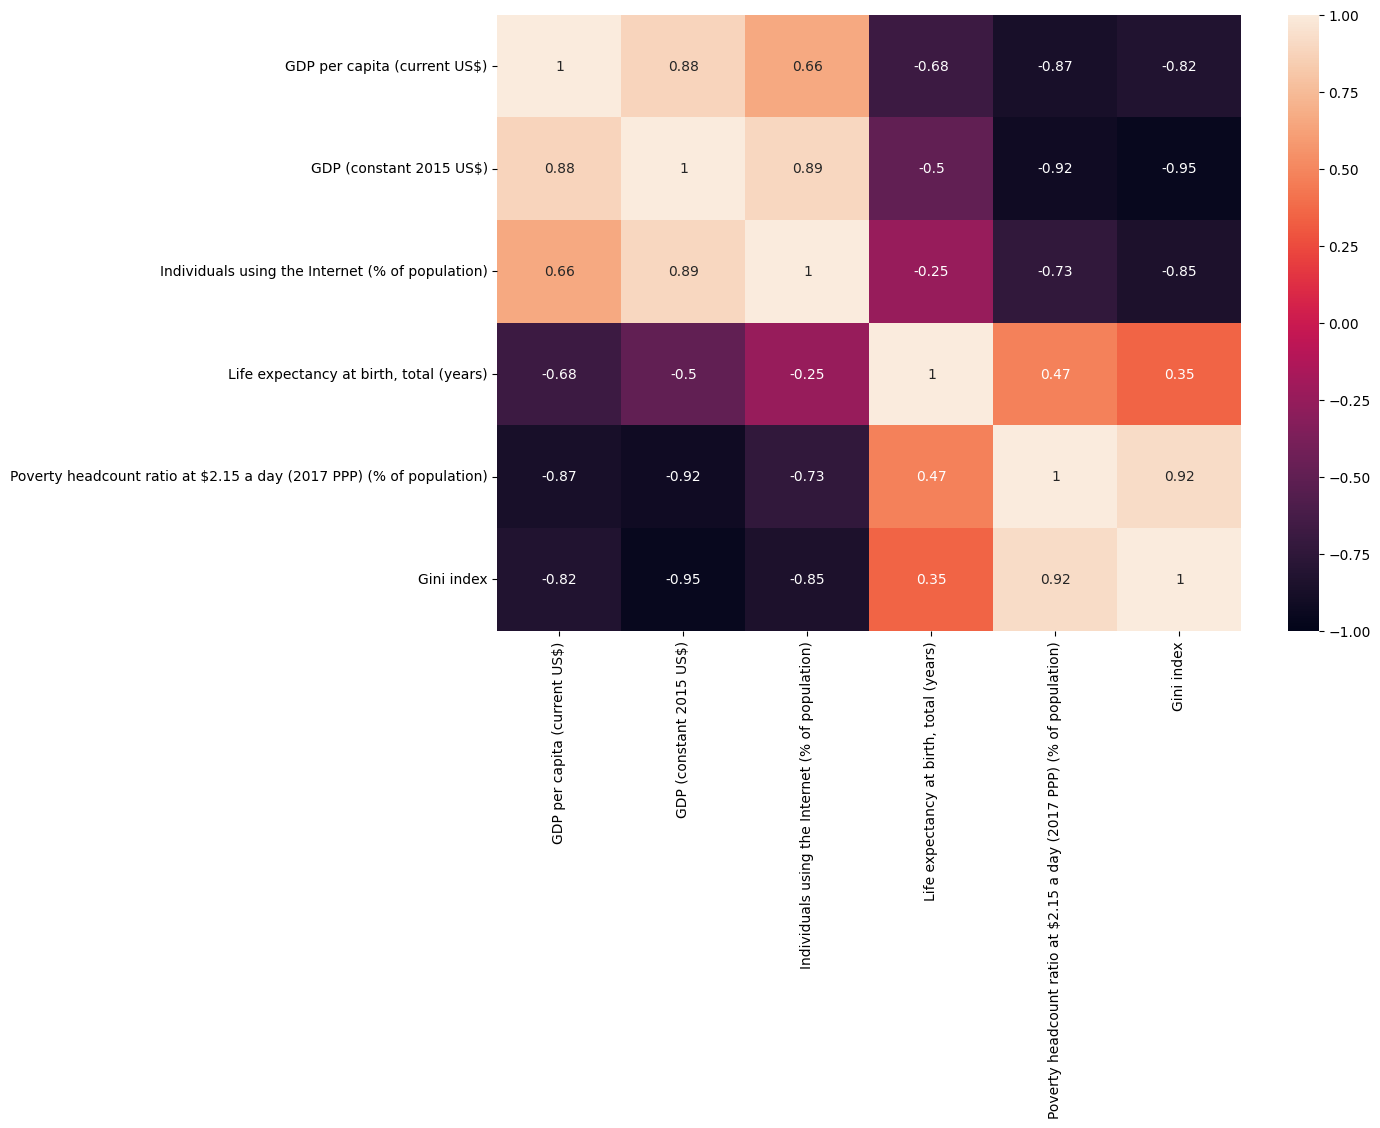

In [9]:
import seaborn as sns
import numpy as np
# matrix = np.triu(df.corr())
plt.figure(figsize=(12, 8)) 

sns.heatmap(df_combined.corr(), annot=True,vmin=-1, vmax=1)

# выводы
- Взаимосвязь между ВВП на душу населения (current US$) и другими показателями:
  - Высокая положительная корреляция с **ВВП в постоянных ценах 2015 года (0.8807)** и **пользователями Интернета (0.6628)**
  - **Отрицательная корреляция с ожидаемой продолжительностью жизни (-0.6816), показателем бедности (-0.8722) и индексом Джини (-0.8212).** Это указывает на то, что в странах с высоким ВВП на душу населения обычно наблюдается низкий уровень бедности, низкая социальная неравномерность и, возможно, более низкая продолжительность жизни.
- Корреляция между **ВВП в постоянных ценах 2015 года** и другими показателями
  - Высокая положительная корреляция с **пользователями Интернета (0.8917)**
  - Отрицательная корреляция с **показателем бедности (-0.9217)** и **индексом Джини (-0.9538)**. Страны с высоким ВВП в постоянных ценах имеют низкий уровень бедности и социальной неравномерности.
- Корреляция между **использованием Интернета** и другими показателями:
  - Отрицательная корреляция с **показателем бедности (-0.7345)** и **индексом Джини (-0.8475)**.
- Корреляция между **продолжительностью жизни** и другими показателями:
  - Положительная корреляция с **показателем бедности (0.4733)**. Более высокая продолжительность жизни связана с более низким уровнем бедности.
  - Положительная корреляция с **индексом Джини (0.3489)**. Это может указывать на то, что страны с высокой продолжительностью жизни имеют умеренные уровни социального неравенства.
- Корреляция между **показателем бедности** и другими показателями:
  - Высокая положительная корреляция с **индексом Джини (0.9200)**.


Данные указывают на то, что страны с высоким экономическим развитием и высоким уровнем использования Интернета часто имеют низкие уровни бедности и социального неравенства, а также более высокую продолжительность жизни.
